# <center>Fake News Detection</center>

<img  src='https://img.etimg.com/thumb/msid-76305449,width-650,imgsize-240474,,resizemode-4,quality-100/fake-news.jpg'></img>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:green; border:0' role="tab" aria-controls="home"><center>Quick navigation</center></h3>

* [1. Introduction](#1)
* [2. Data Reading and Analysis](#2)
* [3. Data Processing and Cleansing](#3)
* [3. Data Exploration](#4)
* [4. Data Visualization](#5)  
* [5. Model Training](#6)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Introduction</center><a id=1></a></h3>

<h2>Problem statement:</h2>

<br>
The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. <br>
In this project, you are given a dataset in the fake-news_data.zip folder. The folder contains aCSV files train_news.csv and you have to use the train_news.csv data to build a model to predict whether a news is fake or not fake. You have to try out different models on the dataset,evaluate their performance, and finally report thebest model you got on the data and its performance.


<h2>Data- Description:</h2>
    
<br>
There are 6 columns in the dataset provided to you. The description of each of the column is given below:<br>
* “id”: Unique id of each news article<br>
* “headline”: It is the title of the news.<br>
* “news”: It contains the full text of the news article<br>
* “Unnamed:0”: It is a serial number<br>
* “written_by”: It represents the author of the news article<br>
* “label”: It tells whether the news is fake (1) or not fake (0).


## <a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Data Reading and Analysis</center></h3><a id=2></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize


Bad key "text.kerning_factor" on line 4 in
G:\DOWNLOADS\Programs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
G:\DOWNLOADS\Programs\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading data 
df=pd.read_csv('C:/Users/HP/Desktop/train_news.csv')
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [3]:
#dropping un necessary features here 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
# let's check data once again 
df.head()

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


Now it's looking perfect  
  >> Let's go deep dive into data 

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Data Processing and Cleansing</center><a id=3></a></h3>

In [5]:
#distribution of classes for prediction
def create_distribution(dataFile):
    
    return sns.countplot(x='label', data=dataFile, palette='hls')

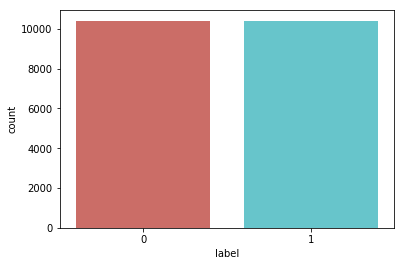

In [6]:
create_distribution(df)

In [7]:
#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
df.isnull().sum()

id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          20800 non-null  int64 
 1   headline    20242 non-null  object
 2   written_by  18843 non-null  object
 3   news        20761 non-null  object
 4   label       20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
#eng_stemmer = SnowballStemmer('english')
#stopwords = set(nltk.corpus.stopwords.words('english'))
X=df.drop('label',axis=1) # Droping output feature
X.head()

,id,headline,written_by,news
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo..."
1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...
2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ..."
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g..."
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...


In [10]:
y=df['label'] # Assigning output to y
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [12]:
df=df.dropna() # Droping null values present
df.shape

(18285, 5)

In [13]:
news=df.copy()

news.reset_index(inplace=True)

news.head(10)

,index,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
5,6,5134,Rapid Evolution Saved This Fish From Pollution...,JoAnna Klein,The State of New Jersey says you can’t eat the...,0
6,7,1504,Alabama Prison Officials Retaliate Against Pri...,Brian Sonenstein,Advocates say prison officials at the Kilby Co...,1
7,9,4203,Can We Live in a Constant State of Love?,Gillian,Leave a reply \nToni Emerson – When we fall in...,1
8,10,11136,Is Hillary a Closet Drunk… New WikiLeak Email ...,V Saxena,BREAKING: Clinton Fixer Reveals Sick Smear Hil...,1
9,11,2150,BLOOMBERG-BACKED PENNSYLVANIA ATTORNEY GENERAL...,Iron Sheik,Home › POLITICS | US NEWS › BLOOMBERG-BACKED P...,1


In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    headline = re.sub('[^a-zA-Z]', ' ', news['headline'][i]) # Filtering all the headlines by removing numbers and symbols
    headline = headline.lower()
    headline = headline.split()
    
    headline = [ps.stem(word) for word in headline if not word in stopwords.words('english')] # making base form of the words
    headline = ' '.join(headline)
    corpus.append(headline)

In [16]:
corpus[2:5]

['cotton hous walk plank vote bill cannot pass senat breitbart',
 'paul lepag besieg main governor send conflict signal intent new york time',
 'digit trump win']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [18]:
X.shape

(18285, 5000)

In [19]:
y=news['label']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0) # Dividing data in train test

In [21]:
print("Features name:",cv.get_feature_names()[:20])
print("Parameters:",cv.get_params())

Features name: ['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl', 'abort', 'abroad', 'absolut', 'absurd', 'abus', 'abus new', 'abus new york', 'accept', 'access', 'access pipelin', 'access pipelin protest', 'accid', 'accident']
Parameters: {'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.int64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': 5000, 'min_df': 1, 'ngram_range': (1, 3), 'preprocessor': None, 'stop_words': None, 'strip_accents': None, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'vocabulary': None}


In [22]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Model Training</center></h3><a id=5></a>

In [23]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

from sklearn import metrics
import numpy as np
import itertools

In [24]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
cm

accuracy:   0.902


array([[3040,  350],
       [ 242, 2403]], dtype=int64)

In [25]:

from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

In [26]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
cm

accuracy:   0.921


array([[3128,  262],
       [ 215, 2430]], dtype=int64)

In [27]:
classifier=MultinomialNB(alpha=0.1)

In [28]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

G:\DOWNLOADS\Programs\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8855012427506214
Alpha: 0.1, Score : 0.8982601491300746
Alpha: 0.2, Score : 0.8994200497100249
Alpha: 0.30000000000000004, Score : 0.9002485501242751
Alpha: 0.4, Score : 0.9009113504556753
Alpha: 0.5, Score : 0.9002485501242751
Alpha: 0.6000000000000001, Score : 0.9005799502899752
Alpha: 0.7000000000000001, Score : 0.9014084507042254
Alpha: 0.8, Score : 0.9010770505385253
Alpha: 0.9, Score : 0.9010770505385253


In [29]:
feature_names = cv.get_feature_names()

classifier.coef_[0]

array([ -9.32421836,  -8.7536735 , -10.04334102, ..., -10.79055543,
        -8.49914363, -10.79055543])

In [30]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.9675111413474324, 'trump'),
 (-4.262110297382556, 'hillari'),
 (-4.393810972851313, 'clinton'),
 (-4.8536057309316964, 'elect'),
 (-5.200813000454728, 'new'),
 (-5.256287973823915, 'video'),
 (-5.292022012514838, 'us'),
 (-5.319686293987194, 'comment'),
 (-5.352959325324056, 'fbi'),
 (-5.397433057467033, 'war'),
 (-5.459986015348155, 'hillari clinton'),
 (-5.492793769119066, 'email'),
 (-5.526714488715316, 'obama'),
 (-5.592058394467554, 'vote'),
 (-5.642415162652731, 'world'),
 (-5.773275588918455, 'donald'),
 (-5.803150850352285, 'russia'),
 (-5.803150850352285, 'donald trump'),
 (-5.826158000130412, 'say'),
 (-5.826158000130412, 'america')]

In [ ]:
corpus = []
for i in range(0, len(news)):
    news1 = re.sub('[^a-zA-Z]', ' ', news['news'][i])
    news1 = news1.lower()
    news1 = news1.split()
    
    news1 = [ps.stem(word) for word in news1 if not word in stopwords.words('english')]
    news1 = ' '.join(news1)
    corpus.append(news1)

Exception ignored in: <function SeekableUnicodeStreamReader.__del__ at 0x000001CB2CA05708>
Traceback (most recent call last):
  File "G:\DOWNLOADS\Programs\lib\site-packages\nltk\data.py", line 1281, in __del__
    self.close()
  File "G:\DOWNLOADS\Programs\lib\site-packages\nltk\data.py", line 1310, in close
    self.stream.close()
KeyboardInterrupt


In [ ]:
corpus[2:5]